## 01 OTU Heatmap

This notebook illustrates the objects and code used to generate OTU heatmaps in [Figure S1](assets/Figure_S1.tif).
***

### 1.1 Clean environment. Load libraries.

In [11]:
rm(list = ls())

##-- load libs
suppressMessages(library(ComplexHeatmap))
suppressMessages(library(circlize))

### 1.2 Import data files.

In [12]:
##-- global variables
rare.depth = 13190

##-- data files 
sample.file = '../data/human_16S.sampleinfo.csv'
otu.file = '../data/human_16S.even13190.rel.sig.csv'

##-- import data 
sample = read.csv(sample.file, row.names = 1)
otu = read.csv(otu.file, row.names = 1)

print(dim(otu))

[1] 63 42


### 1.3 Transform relative abundance into log scale for plotting. Prepare sample annotation groups (NR and R).

In [13]:
##-- convert to log scale 
otu = log10(round(otu * rare.depth) + 1)

##-- prep input for heatmap 
data.plot = t(scale(t(as.matrix(otu)), scale=FALSE))

##-- add sample annotation 
sample.anno = sample[,c('Response'),drop=FALSE]
sample.anno = sample.anno[order(match(row.names(sample.anno),
                                      colnames(data.plot))),,drop=F]
plot.colors = c('NonResponder' = '#0000CC','Responder'='#CC0000')

sample.anno.colors = list(
  Response = plot.colors
)

plot.anno = HeatmapAnnotation(df = sample.anno,
                              col = sample.anno.colors)

print(plot.anno)

A HeatmapAnnotation object with 1 annotation.

An annotation with discrete color mapping
name: Response 
position: column 
show legend: TRUE 



### 1.4 Draw the heatmap on the OTUs differetially abundant between NR and R groups. OTUs are clustered on the row and patients are clustered on the column.

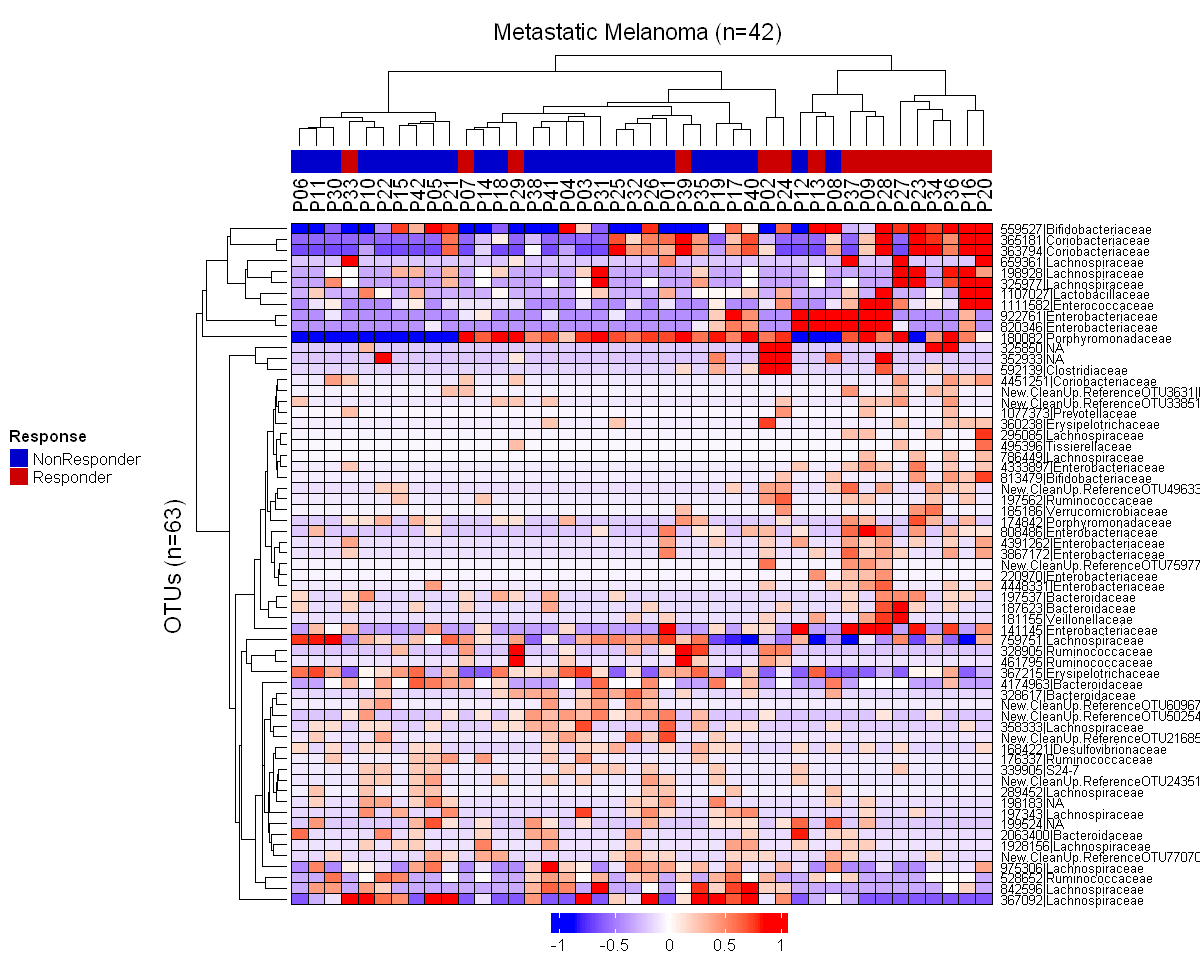

In [14]:
##-- set up R plot display options in notebook
options(jupyter.plot_mimetypes = "image/png")
options(repr.plot.width = 10, repr.plot.height = 8)

##-- draw heatmap
col.title = paste0('Metastatic Melanoma (n=',ncol(data.plot),') ')
row.title = paste0('OTUs (n=',nrow(data.plot),') ')
myheatcol = colorRamp2(c(-0.8, 0, 0.8), c("blue", "white", "red"))

p1 = Heatmap(data.plot,
        na_col = "#000000",
        col = myheatcol,
        rect_gp = gpar(col = '#000000'),
        show_heatmap_legend = TRUE,
        column_title = col.title,
        row_title = row.title,
        row_dend_width = unit(2, "cm"),
        column_dend_height = unit(2, "cm"),
        cluster_rows = TRUE,
        cluster_columns = TRUE,
        clustering_distance_rows = "euclidean",
        clustering_method_rows = "ward.D2",
        clustering_distance_columns = "euclidean",
        clustering_method_columns = "ward.D2",
        show_row_names = TRUE,
        column_names_side = 'top',
        column_names_gp = gpar(fontsize = 12),
        row_names_gp = gpar(fontsize = 8),
        top_annotation = plot.anno,
        heatmap_legend_param = 
          list(legend_direction = "horizontal",
               legend_width = unit(5, "cm"), 
               color_bar = 'continuous',
               title = '')
)

draw(p1, annotation_legend_side = "left", heatmap_legend_side = "bottom")

In [15]:
sessionInfo()

R version 3.4.2 (2017-09-28)
Platform: x86_64-w64-mingw32/x64 (64-bit)
Running under: Windows 10 x64 (build 14393)

Matrix products: default

locale:
[1] LC_COLLATE=English_United States.1252 
[2] LC_CTYPE=English_United States.1252   
[3] LC_MONETARY=English_United States.1252
[4] LC_NUMERIC=C                          
[5] LC_TIME=English_United States.1252    

attached base packages:
[1] grid      stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
[1] circlize_0.4.1        ComplexHeatmap_1.14.0

loaded via a namespace (and not attached):
 [1] Rcpp_0.12.13         DEoptimR_1.0-8       compiler_3.4.2      
 [4] RColorBrewer_1.1-2   plyr_1.8.4           viridis_0.4.0       
 [7] class_7.3-14         prabclus_2.2-6       tools_3.4.2         
[10] mclust_5.3           dendextend_1.5.2     digest_0.6.12       
[13] uuid_0.1-2           viridisLite_0.2.0    lattice_0.20-35     
[16] jsonlite_1.5         evaluate_0.10.1      tibble_1.3.4     